| |<font size="5">Lasso نموذج  </font>|
|-:|-:|
|<img src="https://cdn-images-1.medium.com/max/800/1*XC-8tHoMxrO3ogHKylRfRA.png" width=400></img>||
||<font size="4"> تحميل البيانات ومعالجتها </font>| 
||<font size="4"> Regularization الضبط في نماذج تعلم الآلة </font>| 
||<font size="4">Ridge  توظيف خوارزمية </font>| 
||<font size="4"> training   تدريب البيانات </font>| 
||<font size="4"> Metrics   تقويم أداء الخوارزمية </font>|

https://www.kirenz.com/post/2019-08-12-python-lasso-regression-auto/

https://www.nmthgiat.com/https://bit.ly/31vVC2u

In [ ]:
pwd

'/content'

In [1]:
# تحميل البيانات الرقمية
import pandas as pd
df= pd.read_csv("../data/features_kept1.csv", index_col=0)

In [2]:
df.head()

,Age,GarageArea,TotalSF,MasVnrArea,WoodDeckSF,BsmtFinSF1,2ndFlrSF,BsmtFinSF2,MiscVal,LotArea,SalePrice
0,5.0,548.0,2566.0,196.0,0.0,706.0,854.0,0.0,0.0,8450.0,208500.0
1,31.0,460.0,2524.0,0.0,298.0,978.0,0.0,0.0,0.0,9600.0,181500.0
2,6.0,608.0,2706.0,162.0,0.0,486.0,866.0,0.0,0.0,11250.0,223500.0
3,36.0,642.0,2473.0,0.0,0.0,216.0,756.0,0.0,0.0,9550.0,140000.0
4,8.0,836.0,3343.0,350.0,192.0,655.0,1053.0,0.0,0.0,14260.0,250000.0


<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcT9GPc3te-hV52pZv1105UrkoNttMfzawJwFg&usqp=CAU" width=100></img>

In [3]:
df.isna().sum()/df.shape[0]

Age           0.003425
GarageArea    0.003425
TotalSF       0.003425
MasVnrArea    0.003425
WoodDeckSF    0.003425
BsmtFinSF1    0.003425
2ndFlrSF      0.003425
BsmtFinSF2    0.003425
MiscVal       0.003425
LotArea       0.003425
SalePrice     0.003425
dtype: float64

In [4]:
df.dropna(inplace=True)

In [5]:
#Standardize the features by removing the mean and scaling to unit variance.
import numpy as np
X=df.drop("SalePrice", axis=1)
y=np.log1p(df.SalePrice)    # test 1st as df.Saleprice  then turn to log1p
# y=df.SalePrice
X.keys()

Index(['Age', 'GarageArea', 'TotalSF', 'MasVnrArea', 'WoodDeckSF',
       'BsmtFinSF1', '2ndFlrSF', 'BsmtFinSF2', 'MiscVal', 'LotArea'],
      dtype='object')

![](https://i.ibb.co/QChD6Y4/Train-test-1.jpg)

In [6]:
# تقسيم البيانات 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y  ,test_size=.33, random_state=42)

In [7]:
from sklearn.preprocessing import StandardScaler

### test 1st   before the train_test_split
scaler = StandardScaler()
# X_scaled= scaler.fit_transform(X)

In [8]:
# this to try   2nd 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<image src="https://static.thenounproject.com/png/2010152-200.png" width=10%></img>

$\Large  RSS_{Ridge}= \sum (Y_i -\beta_0 -\beta_iX_i )^2 + \alpha\sum|\beta_i|  $

In [9]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.5)
lasso.fit(X_train_scaled , y_train)

Lasso(alpha=0.5)

![](https://i.ibb.co/wQC2qF6/ruler.png)

In [10]:
print(f'Lasso Regression: R^2 score on training set: {lasso.score(X_train_scaled, y_train):.3f}' )

print(f'Lasso Regression: R^2 score on test set: {    lasso.score(X_test_scaled, y_test):.3f}'   )

Lasso Regression: R^2 score on training set: 0.000
Lasso Regression: R^2 score on test set: -0.000


In [11]:
from sklearn import metrics
print(f'RMSE : {np.sqrt(metrics.mean_squared_error(y_test, lasso.predict(X_test))) :.3f}  ')

RMSE : 0.409  


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [15]:
np.expm1(0.413)

np.float64(0.5113450259339937)

In [17]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import mean_squared_error, make_scorer

mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

train_sizes, train_scores, test_scores = learning_curve(
    estimator=lasso,          # Your scikit-learn model
    X=X_train,                # Training data features
    y=y_train,                # Training data target
    train_sizes=np.linspace(0.1, 1.0, 10),  # Relative/absolute sizes of training sets
    cv=5,                     # Cross-validation strategy (e.g., 5-fold)
    scoring=mse_scorer,        # Use the scorer object (or a string like 'neg_mean_squared_error')
    n_jobs=-1,               # Use all available CPU cores
    shuffle=True,              # Shuffle the data before splitting into batches
    random_state=42,         # For reproducibility
    return_times = False,      # if True will return fit and score times
    verbose=0                  # Controls verbosity: higher values = more messages
)

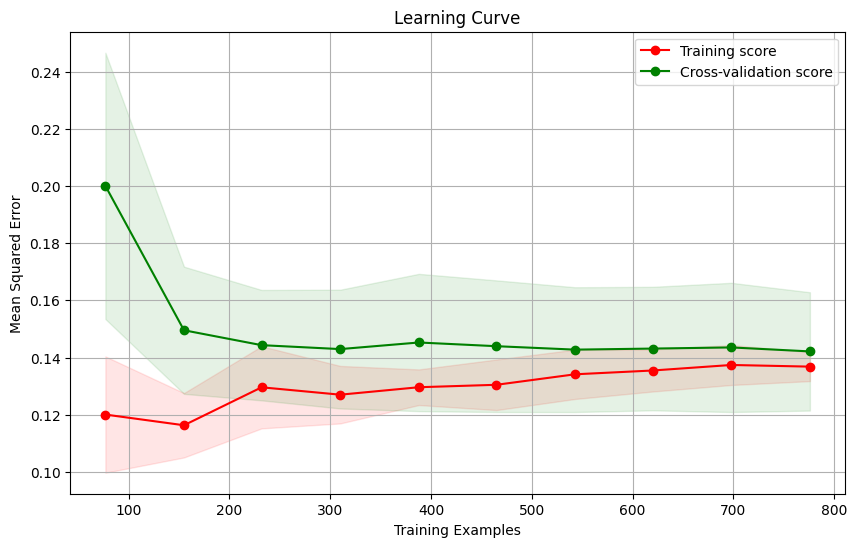

Train Sizes: [ 77 155 232 310 388 465 543 620 698 776]
Train Scores (Mean):
 [0.12005787 0.11632003 0.1295896  0.12700736 0.12961572 0.13046825
 0.1341379  0.13546262 0.13739564 0.13681902]
Train Scores (Std):
 [0.02033324 0.01125958 0.01436542 0.01005554 0.00622586 0.00883733
 0.0086274  0.00734335 0.00699369 0.00506462]
Test Scores (Mean):
 [0.20001096 0.14953149 0.14432235 0.14294918 0.14525497 0.14396071
 0.14275988 0.14312861 0.14353082 0.1421377 ]
Test Scores (Std):
 [0.04655556 0.02223316 0.01930382 0.02076204 0.02400118 0.02301477
 0.0218126  0.02159439 0.02258808 0.02068832]


In [19]:
import matplotlib.pyplot as plt
train_scores_mean = -np.mean(train_scores, axis=1)  # Average across folds (negate for MSE)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)    # Average across folds (negate for MSE)
test_scores_std = np.std(test_scores, axis=1)

# 6. Plot the Learning Curve
# ---------------------------
plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Mean Squared Error")  # Label appropriately for your metric
plt.grid()

# Plot the mean training scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
# Plot the mean test scores
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

# Plot the standard deviation (as shaded areas)
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.legend(loc="best")  # Show the legend
plt.show()


# 7. (Optional)  Print raw results:
#--------------------------------------
print("Train Sizes:", train_sizes)
print("Train Scores (Mean):\n", train_scores_mean)
print("Train Scores (Std):\n", train_scores_std)
print("Test Scores (Mean):\n", test_scores_mean)
print("Test Scores (Std):\n", test_scores_std)

In [20]:
alphas = (0.001, 0.01, 0.1, 0.5, 1, 2, 10)
# enumerate through alphas with index and i
for  i in  alphas:    
    lasso = Lasso(alpha = i)
    lasso.fit(X_train_scaled, y_train)
    print(f'Lasso Regression: R^2 score on test set for  lamdbda= {i}, {lasso.score(X_test_scaled, y_test):.3}')


Lasso Regression: R^2 score on test set for  lamdbda= 0.001, 0.118
Lasso Regression: R^2 score on test set for  lamdbda= 0.01, 0.116
Lasso Regression: R^2 score on test set for  lamdbda= 0.1, 0.0212
Lasso Regression: R^2 score on test set for  lamdbda= 0.5, -2.5e-05
Lasso Regression: R^2 score on test set for  lamdbda= 1, -2.5e-05
Lasso Regression: R^2 score on test set for  lamdbda= 2, -2.5e-05
Lasso Regression: R^2 score on test set for  lamdbda= 10, -2.5e-05


In [21]:
X.shape , len(alphas)

((1450, 10), 7)

In [22]:
# plot  alphas

# prepare data for enumerate
coeff_a = np.zeros((len(alphas), X.shape[1]))
train_r_squared = np.zeros(len(alphas))
test_r_squared = np.zeros(len(alphas))

In [26]:
# enumerate through alphas  with index and i
for ind, i in enumerate(alphas):    
    lasso = Lasso(alpha = i)
    lasso.fit(X_train_scaled, y_train)

    coeff_a[ind,:] = lasso.coef_
    train_r_squared[ind] = lasso.score(X_train_scaled, y_train)
    test_r_squared[ind] = lasso.score(X_test_scaled, y_test)

/tmp/ipykernel_71344/1196777068.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
/tmp/ipykernel_71344/1196777068.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)


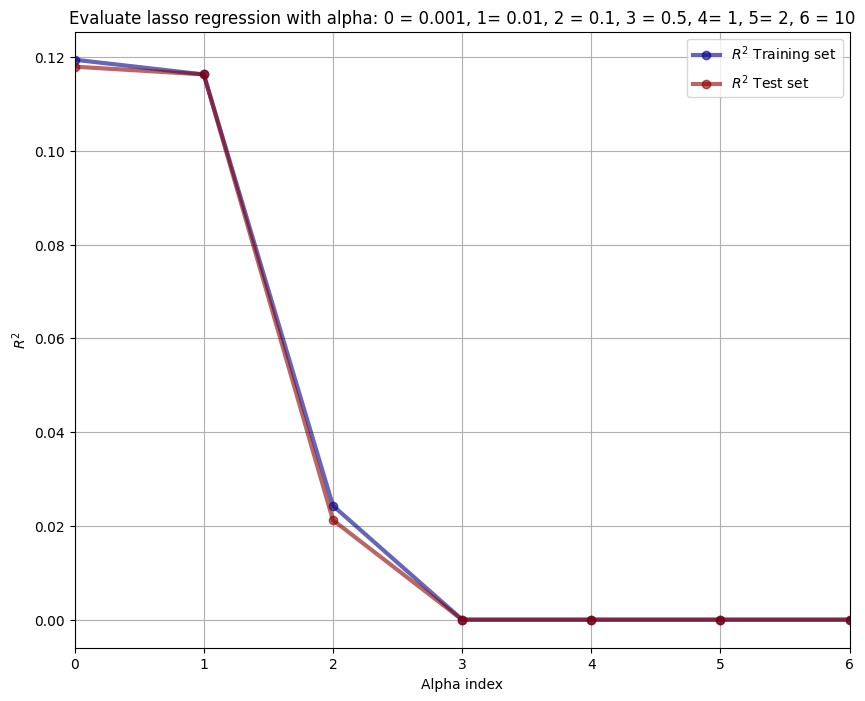

In [27]:
# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Alpha index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate lasso regression with alpha: 0 = 0.001, 1= 0.01, 2 = 0.1, 3 = 0.5, 4= 1, 5= 2, 6 = 10')
plt.legend(loc='best')
plt.grid()

In [ ]:
#  Validation_curve   توظيف 

In [28]:
from sklearn.model_selection import validation_curve
from sklearn.linear_model import Ridge
import numpy as np

alphas=np.logspace(-7, 30, 10)
from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(estimator=lasso, 
                                              X=X_train, 
                                              y=y_train,
                                              param_name="alpha" ,
                                              param_range=alphas, 
                                              cv=10
 )

/tmp/ipykernel_71344/1528153738.py:11: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim([0, 0.1])


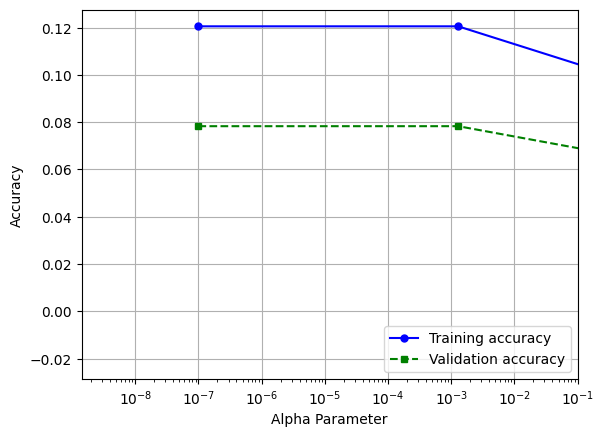

In [29]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(alphas, train_mean, color='blue', marker='o',markersize=5, label='Training accuracy')
plt.plot(alphas, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='Validation accuracy')
plt.grid()
plt.xscale('log')

plt.xlabel('Alpha Parameter')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.xlim([0, 0.1])
plt.show()

In [ ]:
lasso = Lasso(alpha=.001).fit(X_train_scaled, y_train)

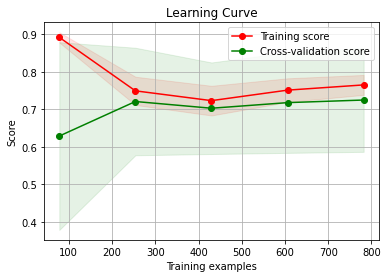

In [ ]:
# تخطيط التعلّم 
import scikitplot as skplt
skplt.estimators.plot_learning_curve(lasso, X_train, y_train, scoring="r2")  #"neg_mean_absolute_error")

In [ ]:
#  لا ننسى انا بصدد توظيف جميع الخصائص الرقمية فقط 